In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import json 

import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, f1_score
from preprocessor import get_train_environment

In [2]:
envGen = get_train_environment(n_splits=50)
stats, X, X_holdout, y, y_holdout = next(envGen)

xgb_class_scores = []
rf_class_scores = []
xgb_reg_scores = []
rf_reg_scores = []

for fold, stats, X_train, X_test, y_train, y_test in envGen:
    print(fold)
    if len(X_train) == 0 or len(X_test) == 0:
        print(f"Skipping empty fold: {fold}")
        continue
    class_y_train = [0 if value == 0 else 1 for value in y_train]
    class_y_test = [0 if value == 0 else 1 for value in y_test]
    # Create and fit the model
    print("XGBClassifier start")
    model_xgb_class = XGBClassifier()
    model_xgb_class.fit(X_train, class_y_train)
    print("XGBClassifier end")
    
    print("RandomForestClassifier start")
    model_rf_class = RandomForestClassifier()
    model_rf_class.fit(X_train, class_y_train)
    print("RandomForestClassifier end")
    
    print("XGBRegressor start")
    model_xgb_reg = XGBRegressor()
    model_xgb_reg.fit(X_train, y_train)
    print("XGBRegressor end")
    
    print("RandomForestRegressor start")
    model_rf_reg = RandomForestRegressor()
    model_rf_reg.fit(X_train, y_train)
    print("RandomForestRegressor end")

    # Predict and evaluate
    predictions_xgb_class = model_xgb_class.predict(X_test)
    f1_xgb_class = f1_score(class_y_test, predictions_xgb_class, average='weighted')
    xgb_class_scores.append(f1_xgb_class)
    
    predictions_rf_class = model_rf_class.predict(X_test)
    f1_rf_class = f1_score(class_y_test, predictions_rf_class, average='weighted')
    rf_class_scores.append(f1_rf_class)

    predictions_xgb_reg = model_xgb_reg.predict(X_test)
    mse_xgb_reg = mean_squared_error(y_test, predictions_xgb_reg)
    xgb_reg_scores.append(mse_xgb_reg)
    
    predictions_rf_reg = model_rf_reg.predict(X_test)
    mse_rf_reg = mean_squared_error(y_test, predictions_rf_reg)
    rf_reg_scores.append(mse_rf_reg)

Found cached folds, using those
0
XGBClassifier start
XGBClassifier end
RandomForestClassifier start
RandomForestClassifier end
XGBRegressor start
XGBRegressor end
RandomForestRegressor start
RandomForestRegressor end
1
XGBClassifier start
XGBClassifier end
RandomForestClassifier start
RandomForestClassifier end
XGBRegressor start
XGBRegressor end
RandomForestRegressor start
RandomForestRegressor end
2
XGBClassifier start
XGBClassifier end
RandomForestClassifier start
RandomForestClassifier end
XGBRegressor start
XGBRegressor end
RandomForestRegressor start
RandomForestRegressor end
3
XGBClassifier start
XGBClassifier end
RandomForestClassifier start
RandomForestClassifier end
XGBRegressor start
XGBRegressor end
RandomForestRegressor start
RandomForestRegressor end
4
XGBClassifier start
XGBClassifier end
RandomForestClassifier start
RandomForestClassifier end
XGBRegressor start
XGBRegressor end
RandomForestRegressor start
RandomForestRegressor end
5
XGBClassifier start
XGBClassifier en

In [8]:
print("XGB Classifier F1 Score:",np.mean(xgb_class_scores))
print("RandomForest Classifier F1 Score:",np.mean(rf_class_scores))
print("XGB Regressor MSE:",np.mean(xgb_reg_scores))
print("RandomForest Regressor MSE:",np.mean(rf_reg_scores))

XGB Classifier F1 Score: 0.9661987812815108
RandomForest Classifier F1 Score: 0.9579253697675516
XGB Regressor MSE: 0.3470637214728185
RandomForest Regressor MSE: 0.3647162864167852


Text(0.5, 1.0, 'Final XGBoost Classifier Model CV Results')

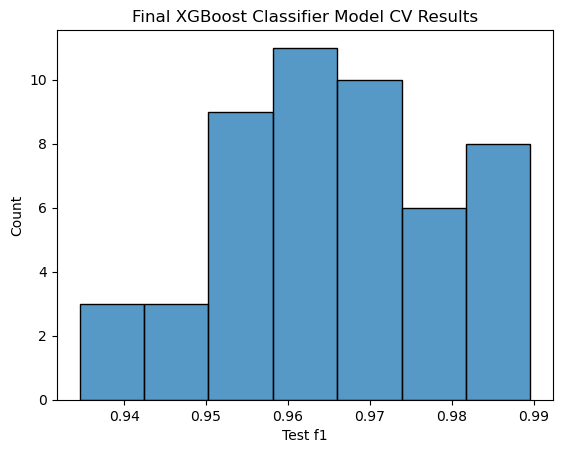

In [4]:
ax = sns.histplot(xgb_class_scores)
ax.set_xlabel("Test f1")
ax.set_title("Final XGBoost Classifier Model CV Results")

Text(0.5, 1.0, 'Final Random Forest Classifier Model CV Results')

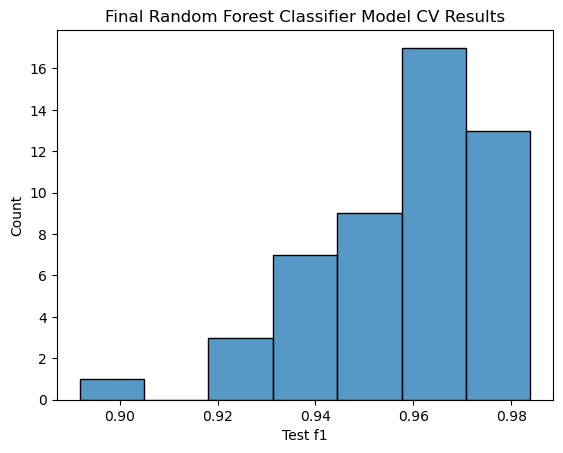

In [5]:
ax = sns.histplot(rf_class_scores)
ax.set_xlabel("Test f1")
ax.set_title("Final Random Forest Classifier Model CV Results")

Text(0.5, 1.0, 'Final XGBoost Regressor Model CV Results')

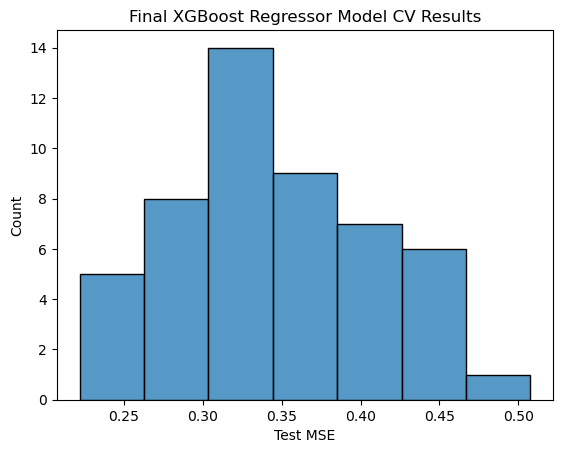

In [6]:
ax = sns.histplot(xgb_reg_scores)
ax.set_xlabel("Test MSE")
ax.set_title("Final XGBoost Regressor Model CV Results")

Text(0.5, 1.0, 'Final Random Forest Regressor Model CV Results')

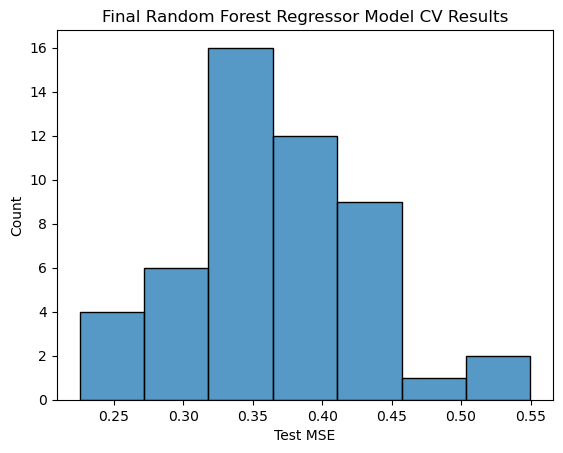

In [7]:
ax = sns.histplot(rf_reg_scores)
ax.set_xlabel("Test MSE")
ax.set_title("Final Random Forest Regressor Model CV Results")